# Model Comparison


In [1]:
!pip install git+git://github.com/christophM/rulefit.git

  Cloning git://github.com/christophM/rulefit.git to /tmp/pip-req-build-e6i_t8hv
  Running command git clone -q git://github.com/christophM/rulefit.git /tmp/pip-req-build-e6i_t8hv
  Created wheel for RuleFit: filename=RuleFit-0.3-cp36-none-any.whl size=7766 sha256=d37e44497244a84a548cf750ae80735cc8e612adb3bff2a3efc072301968901e
  Stored in directory: /tmp/pip-ephem-wheel-cache-r6vzn18l/wheels/0b/51/b8/9dc135361d610b383e5029f82ceb5b73eef717e0c1212c8cd1
Successfully built RuleFit


In [2]:

#importing necessary libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold,cross_validate
from sklearn.metrics import make_scorer, roc_auc_score,roc_curve, auc, accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from scipy import interp
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from xgboost import XGBClassifier
import xgboost
import lightgbm as lgb
from rulefit import RuleFit
from sklearn.metrics import f1_score

from IPython.display import display
pd.options.display.max_columns = None

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

result = pd.DataFrame()


Using TensorFlow backend.


# Data Processing

In [3]:
#importing the data
#training_data = pd.read_csv('bio1.csv') 
training_data = pd.read_csv('processed_classification_data_montreal_pca.csv') 

training_data.shape

(21093, 36)

In [4]:

training_data = training_data.loc[:, ~training_data.columns.str.contains('^Unnamed')]
training_data.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,host_is_superhost
0,-0.474339,-0.474844,0.389883,-0.471864,0.185293,1.116366,0.414690,0.063444,-1.203412,0.699074,-0.063986,0.086385,-0.252392,-0.248272,-0.030587,-0.587326,0.135535,-0.320858,0.334783,0.145255,-0.036997,0.048747,-0.045505,-0.214200,0.179186,-0.062494,-0.022941,-0.047115,-0.001091,-0.003606,0.006182,-0.055095,-0.000116,-0.071183,0.002289,0
1,-0.674078,-0.025294,0.602587,0.180993,0.585290,-0.683450,-0.475963,0.361476,-0.196342,0.431648,-1.009008,0.092240,-0.252311,-0.204166,-0.082996,-0.526020,0.385506,-0.296933,0.366007,-0.001905,-0.031533,0.099835,-0.065345,-0.216041,0.232375,-0.067576,-0.017458,-0.032399,-0.011691,-0.001619,0.007858,-0.022524,-0.049704,-0.103367,0.019225,0
2,-0.954492,0.853418,-0.756602,0.523384,0.160506,0.034401,0.357726,0.805028,-0.347207,-0.205824,0.182438,0.158347,0.745091,-0.071641,0.001081,-0.432285,-0.081086,-0.180307,0.250225,0.166116,0.037690,0.002307,-0.109274,-0.113535,-0.018676,-0.059342,-0.011082,0.016078,-0.001783,-0.002740,-0.023663,-0.074266,0.004455,-0.086789,0.045459,1
3,-0.848249,-0.036345,-0.310128,0.352206,1.092834,-0.451777,0.632280,0.280157,-0.374359,0.064426,0.484660,0.576353,-0.329901,-0.110429,-0.005397,-0.411799,-0.192387,-0.140484,0.158154,0.282853,-0.030114,0.074417,-0.084751,-0.146881,0.155578,-0.033099,-0.002411,-0.053849,0.005864,0.009079,-0.012034,-0.160084,0.041781,-0.193927,0.061497,0
4,-0.721186,0.619287,0.169457,-0.370367,0.968512,0.145605,0.976594,-0.345198,0.019229,1.565775,0.585498,0.289668,-0.213695,-0.120285,0.037532,-0.180915,-0.266716,-0.265141,0.342741,-0.052178,0.006970,-0.054059,-0.086305,-0.105225,0.039258,-0.056074,-0.033911,-0.057164,0.005415,-0.018287,-0.029441,-0.032082,0.028960,-0.001740,0.019641,0


In [0]:
X = training_data.drop('host_is_superhost',axis=1).to_numpy()
y = training_data['host_is_superhost'].to_numpy()



Thus, there are 158 positve samples and 150 negative samples in our dataset

In [0]:
pd.Series(y).value_counts()
X_train, y_train = X, y

# MODELS

In [0]:
#Performs k fold cross validation with the specified classifer and returns all the necessary metrics
def cross_val_scores(classifier, clf, X, y):
    tprs = []
    plt.figure(figsize=(10, 10))
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 31)
    cv = 10
    k_fold = StratifiedKFold(n_splits = cv, shuffle = True,random_state=0)
    k_scores = []
    recall_scores = []
    precision_scores = []
    accuracy_scores = []
    aucs = []
    tprs = []
    f1_scores =[]
    
    for i, (train, test) in enumerate(k_fold.split(X, y)):
        from imblearn.over_sampling import SMOTE
        resampler = SMOTE( random_state=442)
        smote_X, smote_y = resampler.fit_resample(X[train], y[train])
        clf.fit(smote_X, smote_y)
        probas_ = clf.predict_proba(X[test])
        k_scores.append(clf.score(X[test], y[test]))
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0       
        recall_scores.append(recall_score(y[test],clf.predict(X[test])))
        precision_scores.append(precision_score(y[test],clf.predict(X[test])))
        accuracy_scores.append(accuracy_score(y[test],clf.predict(X[test])))
        f1_scores.append(f1_score(y[test],clf.predict(X[test])))
    result[classifier] = aucs

        
    plt.plot([0, 1], [0, 1],'r--', label='No-skill', alpha=0.7)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.15, label=r'$\pm$ 1 std. dev.')
    plt.title('ROC - '+str(classifier))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.show()
    
    print("%s Mean AUC: %0.2f (+/- %0.2f)" % (classifier,mean_auc, std_auc))

    mean_recall = np.array(recall_scores).mean()
    std_recall =  np.array(recall_scores).std()
    print("%s Recall: %0.2f (+/- %0.2f)" % (classifier,mean_recall, std_recall))

    mean_precision = np.array(precision_scores).mean()
    std_precision =  np.array(precision_scores).std()
    print("%s Precision: %0.2f (+/- %0.2f)" % (classifier, mean_precision, std_precision))

    mean_accuracy = np.array(accuracy_scores).mean()
    std_accuracy =  np.array(accuracy_scores).std()
    print("%s Accuracy: %0.2f (+/- %0.2f)" % (classifier, mean_accuracy, std_accuracy))

    
    mean_f1 = np.array(f1_scores).mean()
    std_f1 =  np.array(f1_scores).std()
    print("%s F1 : %0.2f (+/- %0.2f)" % (classifier, mean_f1 , std_f1))

    mean_cvaccuracy = np.array(k_scores).mean()
    std_cvaccuracy =  np.array(k_scores).std()
    print("%s Cross validation accuracy: %0.2f (+/- %0.2f)" % (classifier, mean_cvaccuracy, std_cvaccuracy))


# Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


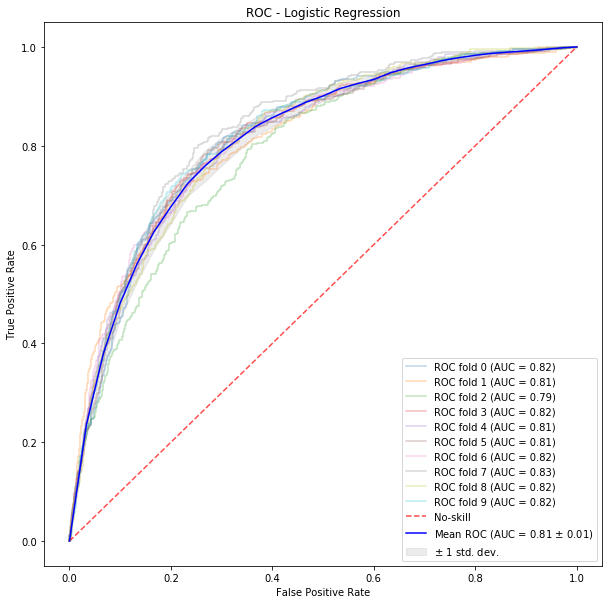

Logistic Regression Mean AUC: 0.81 (+/- 0.01)
Logistic Regression Recall: 0.75 (+/- 0.03)
Logistic Regression Precision: 0.41 (+/- 0.02)
Logistic Regression Accuracy: 0.74 (+/- 0.01)
Logistic Regression F1 : 0.53 (+/- 0.02)
Logistic Regression Cross validation accuracy: 0.74 (+/- 0.01)


In [8]:
clf = LogisticRegression(random_state=0)
#clf.fit(X_train,y_train)
cross_val_scores('Logistic Regression', clf, X_train, y_train)

# Naive Bayes

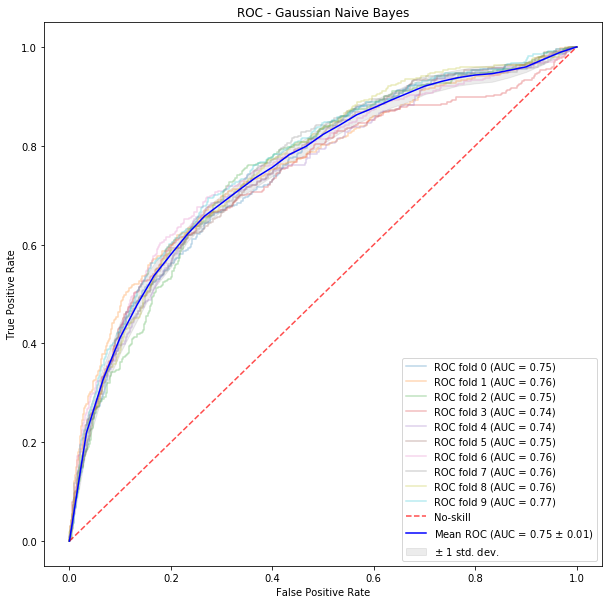

Gaussian Naive Bayes Mean AUC: 0.75 (+/- 0.01)
Gaussian Naive Bayes Recall: 0.85 (+/- 0.01)
Gaussian Naive Bayes Precision: 0.27 (+/- 0.01)
Gaussian Naive Bayes Accuracy: 0.53 (+/- 0.01)
Gaussian Naive Bayes F1 : 0.41 (+/- 0.01)
Gaussian Naive Bayes Cross validation accuracy: 0.53 (+/- 0.01)


In [9]:
clf = GaussianNB()
#clf.fit(X_train,y_train)
cross_val_scores('Gaussian Naive Bayes', clf, X_train, y_train)

# K-Nearest Neighbours

In [0]:
# param_dist = {"n_neighbors": np.arange(2,11)}
# scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score),'F1': make_scorer(f1_score),\
#            'Precision': make_scorer(precision_score),'Recall' : make_scorer(recall_score)}

# clf = KNeighborsClassifier(n_jobs = -1)

# grid_search = GridSearchCV(clf, param_grid =param_dist,scoring=scoring, refit='AUC',cv=10, iid=False,n_jobs = -1)

# start = time.time()
# best_model = grid_search.fit(X_train, y_train)
# print("GridSearchCV took %.2f seconds to find optimal parameters." % (time.time() - start))
# print('Optimal Parameters found : ', best_model.best_estimator_.get_params())
# print('AUC for optimal model : ',best_model.best_score_)
# results = grid_search.cv_results_
# pd.DataFrame(results)

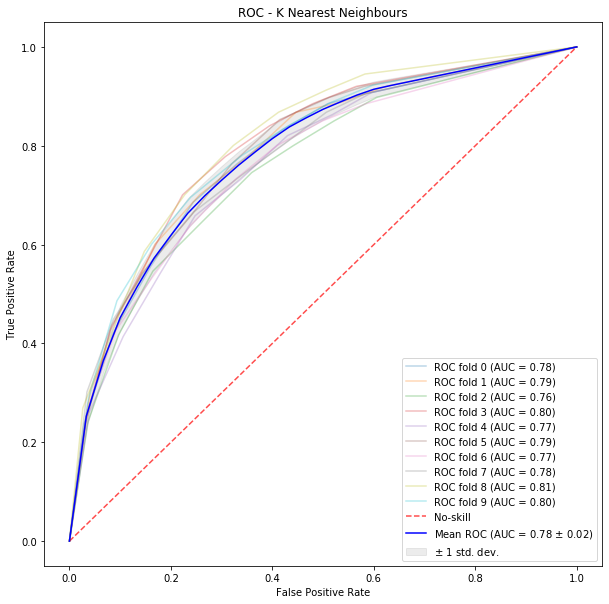

K Nearest Neighbours Mean AUC: 0.78 (+/- 0.02)
K Nearest Neighbours Recall: 0.68 (+/- 0.02)
K Nearest Neighbours Precision: 0.40 (+/- 0.02)
K Nearest Neighbours Accuracy: 0.74 (+/- 0.01)
K Nearest Neighbours F1 : 0.50 (+/- 0.02)
K Nearest Neighbours Cross validation accuracy: 0.74 (+/- 0.01)


In [11]:
#Use the parameters found by gridsearch

clf = KNeighborsClassifier(n_neighbors = 8)
#clf.fit(X_train,y_train)
cross_val_scores('K Nearest Neighbours', clf, X_train, y_train)


# Random Forest

In [0]:
# params = {"n_estimators": [100,1000], 
#               "criterion" : ['gini','entropy'],
#               "max_depth" : [None,2,10],
#               "min_samples_split" : [2,5]}

# scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score),'F1': make_scorer(f1_score),\
#            'Precision': make_scorer(precision_score),'Recall' : make_scorer(recall_score)}

# clf =RandomForestClassifier(random_state=0, n_jobs = -1)

# random_search = RandomizedSearchCV(clf, param_distributions = params, scoring=scoring, refit='AUC',cv=10, iid=False,n_jobs = -1,n_iter=8)

# start = time.time()
# best_model = random_search.fit(X_train, y_train)
# print("RandomizedSearchCV took %.2f seconds to find optimal parameters." % (time.time() - start))
# print('Optimal Parameters found : ', best_model.best_estimator_.get_params())
# print('AUC for optimal model : ',best_model.best_score_)
# results = random_search.cv_results_
# pd.DataFrame(results)

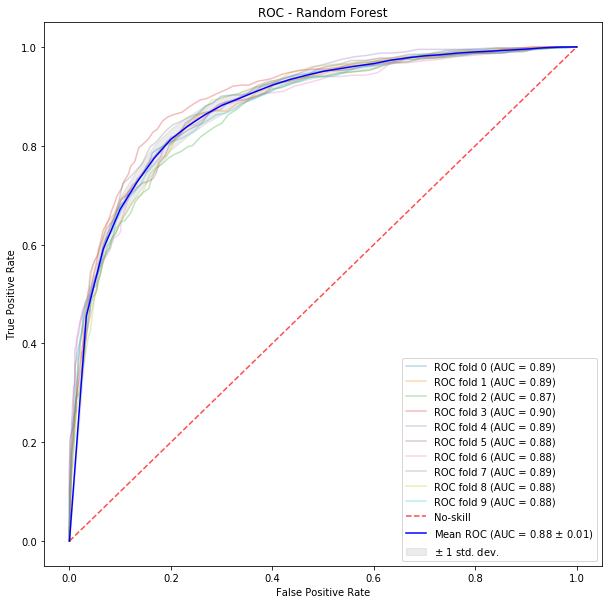

Random Forest Mean AUC: 0.88 (+/- 0.01)
Random Forest Recall: 0.63 (+/- 0.02)
Random Forest Precision: 0.64 (+/- 0.02)
Random Forest Accuracy: 0.86 (+/- 0.01)
Random Forest F1 : 0.64 (+/- 0.01)
Random Forest Cross validation accuracy: 0.86 (+/- 0.01)


In [13]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini',min_samples_split=2,random_state=0, n_jobs = -1)
#clf.fit(X_train,y_train)
    
cross_val_scores('Random Forest', clf, X_train, y_train)

# Decision Tree

In [0]:
# params={ "max_depth" : [None,2,5,10],
#               "min_samples_split" : [2,3,4,5]}
# clf=DecisionTreeClassifier(random_state=0)


# scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score),'F1': make_scorer(f1_score),\
#            'Precision': make_scorer(precision_score),'Recall' : make_scorer(recall_score)}

# grid_search = GridSearchCV(clf, param_grid = params, scoring=scoring, refit='AUC',cv=10, iid=False,n_jobs = -1)

# start = time.time()
# best_model = grid_search.fit(X_train, y_train)
# print("GridSearchCV took %.2f seconds to find optimal parameters." % (time.time() - start))
# print('Optimal Parameters found : ', best_model.best_estimator_.get_params())
# print('AUC for optimal model : ',best_model.best_score_)
# results = grid_search.cv_results_
# pd.DataFrame(results)


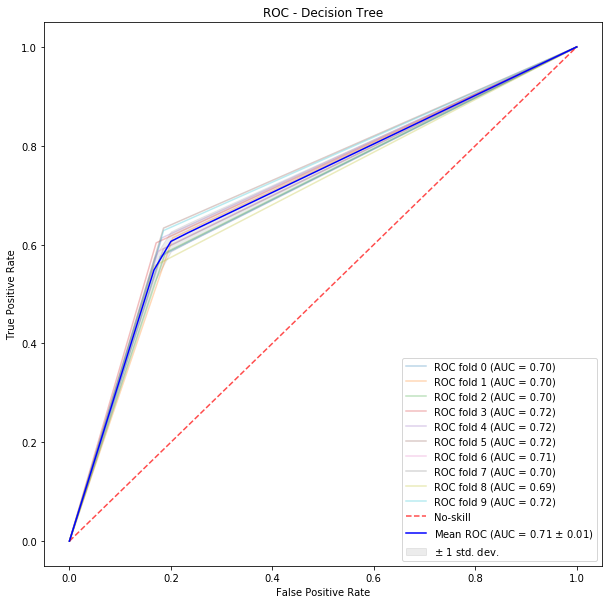

Decision Tree Mean AUC: 0.71 (+/- 0.01)
Decision Tree Recall: 0.60 (+/- 0.02)
Decision Tree Precision: 0.44 (+/- 0.01)
Decision Tree Accuracy: 0.78 (+/- 0.01)
Decision Tree F1 : 0.50 (+/- 0.01)
Decision Tree Cross validation accuracy: 0.78 (+/- 0.01)


In [14]:
clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2, random_state=0)
#clf.fit(X_train,y_train) 
cross_val_scores('Decision Tree', clf, X_train, y_train)

# Support Vector Machine - SVM

In [0]:
 
# clf = SVC(kernel = 'rbf', probability = True,random_state=0)
# params = {'gamma': [0.1,0.01,0.001,0.0001], 'C': [1, 10, 100, 1000]}

# grid_search = GridSearchCV(clf, param_grid = params ,cv=10, n_jobs=-1, refit='roc_auc', iid=False)

# start = time.time()
# best_model = grid_search.fit(X_train, y_train)
# print("GridSearchCV took %.2f seconds to find optimal parameters." % (time.time() - start))
# print('Optimal Parameters found : ', best_model.best_estimator_.get_params())
# print('AUC for optimal model : ',best_model.best_score_)
# results = grid_search.cv_results_
# pd.DataFrame(results)


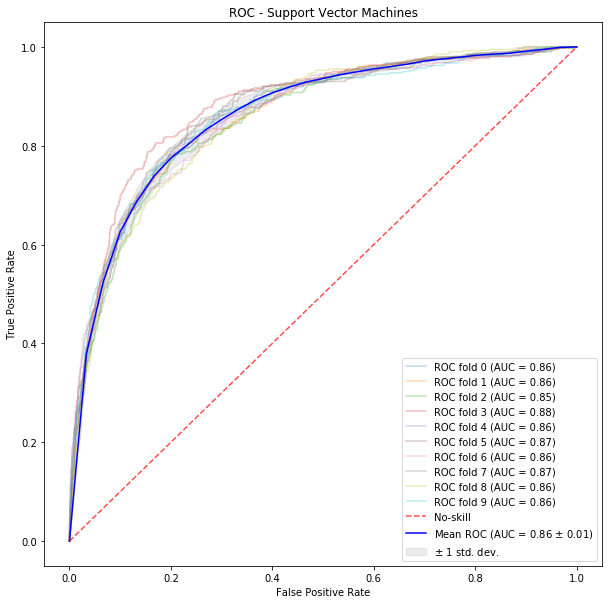

Support Vector Machines Mean AUC: 0.86 (+/- 0.01)
Support Vector Machines Recall: 0.71 (+/- 0.02)
Support Vector Machines Precision: 0.53 (+/- 0.02)
Support Vector Machines Accuracy: 0.83 (+/- 0.01)
Support Vector Machines F1 : 0.61 (+/- 0.02)
Support Vector Machines Cross validation accuracy: 0.83 (+/- 0.01)


In [15]:
clf = SVC(kernel = 'rbf', probability = True, C=5, gamma=0.1,random_state=0)
#clf.fit(X_train,y_train)
cross_val_scores('Support Vector Machines', clf, X_train, y_train)

# XGBoost

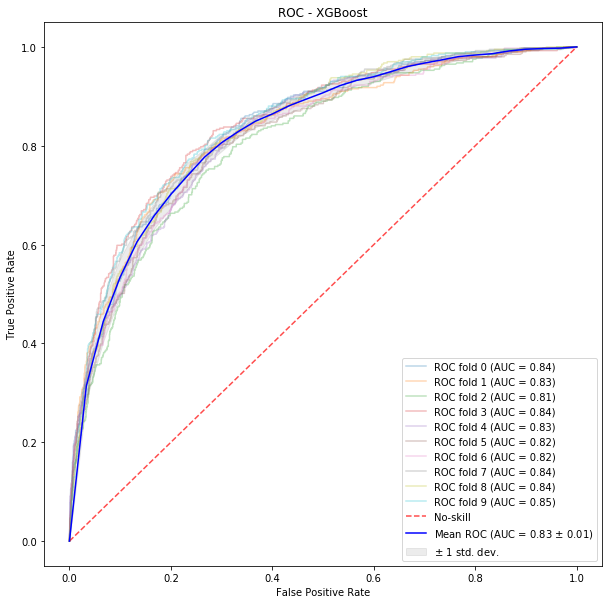

XGBoost Mean AUC: 0.83 (+/- 0.01)
XGBoost Recall: 0.71 (+/- 0.02)
XGBoost Precision: 0.44 (+/- 0.02)
XGBoost Accuracy: 0.77 (+/- 0.01)
XGBoost F1 : 0.55 (+/- 0.02)
XGBoost Cross validation accuracy: 0.77 (+/- 0.01)


In [22]:
model = xgboost.XGBClassifier( 
                      learning_rate=0.01,  
                      n_estimators=200)
cross_val_scores('XGBoost', model, X_train, y_train)

result.to_csv('results-oversampled.csv', header = True, index= False)



In [18]:
from sklearn.model_selection import GridSearchCV

clf = lgb.LGBMClassifier()

param_grid = {
    'learning_rate': [0.08, 0.04,0.02,0.01, 0.1, 1,2],
    'n_estimators': [100,200,300,500],
    'max_depth' : [None,3,4,5,6,7,8,9,10], 
}

scoring = {'AUC': 'roc_auc'}

grid_search = RandomizedSearchCV(clf, param_distributions = param_grid, scoring=scoring, refit='AUC',cv=10,n_iter=10, iid=False,n_jobs = -1)

start = time.time()
best_model = grid_search.fit(X, y)
print("GridSearchCV took %.2f seconds to find optimal parameters." % (time.time() - start))
print('Optimal Parameters found : ', best_model.best_estimator_.get_params())
print('R2 for optimal model : ',best_model.best_score_)
results = grid_search.cv_results_
pd.DataFrame(results)

GridSearchCV took 164.14 seconds to find optimal parameters.
Optimal Parameters found :  {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.08, 'max_depth': 7, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
R2 for optimal model :  0.859282128969922


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,split5_test_AUC,split6_test_AUC,split7_test_AUC,split8_test_AUC,split9_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC
0,5.418854,0.082601,0.053244,0.004290,300,None,0.02,"{'n_estimators': 300, 'max_depth': None, 'lear...",0.841806,0.922546,0.906107,0.895036,0.896849,0.869222,0.842263,0.864237,0.821128,0.708031,0.856722,0.058198,4
1,2.799073,0.028601,0.033823,0.003365,200,7,0.1,"{'n_estimators': 200, 'max_depth': 7, 'learnin...",0.839367,0.924214,0.907227,0.894580,0.899468,0.875338,0.852452,0.861378,0.825285,0.688729,0.856804,0.063454,3
2,1.985374,0.016440,0.028860,0.002088,300,3,0.01,"{'n_estimators': 300, 'max_depth': 3, 'learnin...",0.822560,0.892184,0.879128,0.854760,0.870136,0.824473,0.805870,0.834969,0.801734,0.705475,0.829129,0.050493,8
3,3.962211,0.033320,0.070867,0.005463,500,4,0.02,"{'n_estimators': 500, 'max_depth': 4, 'learnin...",0.839566,0.916708,0.901652,0.886053,0.895250,0.861688,0.837475,0.863536,0.817970,0.697459,0.851736,0.059427,6
4,3.962458,0.075395,0.027962,0.002299,200,9,0.01,"{'n_estimators': 200, 'max_depth': 9, 'learnin...",0.836310,0.909379,0.897011,0.878510,0.884387,0.841171,0.822470,0.853888,0.815999,0.697675,0.843680,0.057209,7
5,4.333555,0.031627,0.046977,0.002579,300,9,0.08,"{'n_estimators': 300, 'max_depth': 9, 'learnin...",0.845724,0.923194,0.906175,0.897407,0.902177,0.872573,0.855633,0.858270,0.816603,0.703770,0.858153,0.059954,2
6,2.848202,0.028876,0.034330,0.001540,200,7,0.08,"{'n_estimators': 200, 'max_depth': 7, 'learnin...",0.845640,0.922156,0.907904,0.894256,0.901356,0.877395,0.850739,0.858375,0.820477,0.714522,0.859282,0.056886,1
7,1.124558,0.084672,0.006904,0.001860,300,3,2,"{'n_estimators': 300, 'max_depth': 3, 'learnin...",0.587150,0.594611,0.549999,0.535568,0.532874,0.533467,0.499309,0.624347,0.546049,0.526475,0.552985,0.035668,10
8,1.790931,0.022070,0.018940,0.000768,100,10,0.08,"{'n_estimators': 100, 'max_depth': 10, 'learni...",0.842887,0.920092,0.907146,0.895366,0.898658,0.871031,0.847419,0.860688,0.817037,0.699825,0.856015,0.060411,5
9,3.438852,0.059859,0.051439,0.005740,300,8,1,"{'n_estimators': 300, 'max_depth': 8, 'learnin...",0.609187,0.702096,0.693411,0.655469,0.703897,0.682098,0.640131,0.638816,0.579944,0.588007,0.649306,0.043815,9


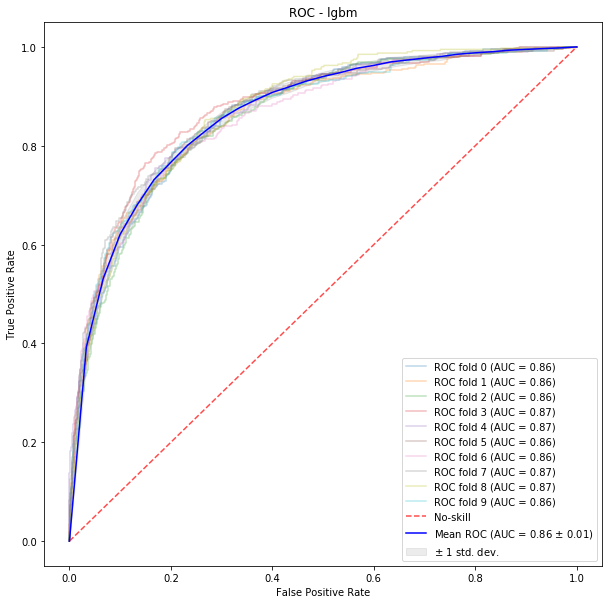

lgbm Mean AUC: 0.86 (+/- 0.01)
lgbm Recall: 0.72 (+/- 0.01)
lgbm Precision: 0.51 (+/- 0.02)
lgbm Accuracy: 0.82 (+/- 0.01)
lgbm F1 : 0.60 (+/- 0.01)
lgbm Cross validation accuracy: 0.82 (+/- 0.01)


In [19]:
gbm = lgb.LGBMClassifier(learning_rate = 0.08, n_estimators=50, silent=True)
cross_val_scores('lgbm', gbm, X_train, y_train)

In [0]:
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=35, kernel_initializer=init, activation='relu'))
    model.add(Dense(12, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer = 'rmsprop' ,metrics=['acc'])
    return model
model = KerasClassifier(build_fn=create_model, verbose=0)
seed = 7
np.random.seed(seed)
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)
model.fit(X_train,y_train)
cross_val_scores('Deep Learning', model, X_train, y_train)


In [0]:
!pip install git+git://github.com/christophM/rulefit.git





In [23]:
scoring = {'AUC': make_scorer(roc_auc_score), 'Accuracy': make_scorer(accuracy_score),'F1': make_scorer(f1_score),
            'Precision': make_scorer(precision_score),'Recall' : make_scorer(recall_score)}
rf = RuleFit(memory_par=0.01, tree_size=4, tree_generator=None, max_rules=100,rfmode='classify',random_state=1) 
results_cross_val= pd.DataFrame(cross_validate(rf.fit(X, y), X, y, cv=10, scoring=scoring))

print(results_cross_val)


rules = pd.DataFrame(rf.get_rules())
rules = rules[rules.coef != 0].sort_values(by="support")
num_rules_rule=len(rules[rules.type=='rule'])
num_rules_linear=len(rules[rules.type=='linear'])
rules.head()

    fit_time  score_time  test_AUC  test_Accuracy   test_F1  test_Precision  \
0  38.573675    0.031111  0.653304       0.829858  0.458522        0.638655   
1  52.194355    0.031850  0.706719       0.897156  0.537313        0.673797   
2  81.790919    0.034987  0.724622       0.893365  0.588665        0.770335   
3  47.239102    0.035908  0.701730       0.827881  0.552404        0.664688   
4  63.601401    0.036067  0.708416       0.859649  0.560831        0.715909   
5  43.606852    0.031844  0.694389       0.816501  0.547368        0.682216   
6  27.361076    0.037556  0.674619       0.814130  0.516049        0.749104   
7  45.101242    0.029512  0.656161       0.836890  0.469136        0.723810   
8  60.139087    0.029743  0.619350       0.834045  0.379433        0.557292   
9  55.804714    0.036422  0.518939       0.867236  0.108280        0.197674   

   test_Recall  
0     0.357647  
1     0.446809  
2     0.476331  
3     0.472574  
4     0.460976  
5     0.457031  
6     0.393

,rule,type,coef,support,importance
55,feature_19 > 0.19484736770391464 & feature_17 ...,rule,0.408081,0.016478,0.051950
66,feature_19 > 0.1103268563747406 & feature_27 >...,rule,-0.463063,0.017508,0.060732
80,feature_19 <= -0.027964124456048012 & feature_...,rule,0.232270,0.031926,0.040834
63,feature_28 > 0.006093537667766213 & feature_0 ...,rule,-0.307343,0.031926,0.054032
107,feature_19 > -0.027964124456048012 & feature_2...,rule,-0.085380,0.039135,0.016557


In [21]:
mean_auc = np.array(results_cross_val['test_AUC']).mean()
std_auc =  np.array(results_cross_val['test_AUC']).std()
print("%s Cross AUC: %0.2f (+/- %0.2f)" % ('RuleFit', mean_auc, std_auc))

mean_recall = np.array(results_cross_val['test_Recall']).mean()
std_recall =  np.array(results_cross_val['test_Recall']).std()
print("%s Recall: %0.2f (+/- %0.2f)" % ('RuleFit',mean_recall, std_recall))

mean_precision = np.array(results_cross_val['test_Precision']).mean()
std_precision =  np.array(results_cross_val['test_Precision']).std()
print("%s Precision: %0.2f (+/- %0.2f)" % ('RuleFit', mean_precision, std_precision))

mean_accuracy = np.array(results_cross_val['test_Accuracy']).mean()
std_accuracy =  np.array(results_cross_val['test_Accuracy']).std()
print("%s Accuracy: %0.2f (+/- %0.2f)" % ('RuleFit', mean_accuracy, std_accuracy))

    
mean_f1 = np.array(results_cross_val['test_F1']).mean()
std_f1 =  np.array(results_cross_val['test_F1']).std()
print("%s F1 : %0.2f (+/- %0.2f)" % ('RuleFit', mean_f1 , std_f1))


#result['RuleFit']=


RuleFit Cross AUC: 0.67 (+/- 0.06)
RuleFit Recall: 0.38 (+/- 0.12)
RuleFit Precision: 0.64 (+/- 0.16)
RuleFit Accuracy: 0.85 (+/- 0.03)
RuleFit F1 : 0.47 (+/- 0.13)


In [0]:
rules['test_AUC']

In [0]:
results_cross_val['test_AUC']
df = pd.read_csv('results-oversampled.csv')
df['Rule Based'] = results_cross_val['test_AUC']
df.to_csv('results.csv', header=True, index= False)